In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import keras

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error

In [ ]:
features = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
output = ['Rings']
columns = features + output

url = "https://raw.githubusercontent.com/AntTranAnt/CS4375_HW2/refs/heads/main/abalone.data"
df = pd.read_csv(url, header=None, names=columns)

# Drop any null or missing values
df = df.dropna()

#Split attributes and output
y = df['Rings']
x = df.drop('Rings', axis=1)

#Split attributes into numerical and categorical to standardize
numCols = x.select_dtypes(include=['int64', 'float64']).columns
catCols = x.select_dtypes(include=['object', 'category']).columns
numTransformer = Pipeline(steps=[('scaler', StandardScaler())])
catTransformer = Pipeline(steps=[('ordinal', OrdinalEncoder())])
preprocessor = ColumnTransformer(
      transformers=[
            ('num', numTransformer, numCols),
            ('cat', catTransformer, catCols)
        ]
    )

xTrans = preprocessor.fit_transform(x)
xDF = pd.DataFrame(xTrans, columns=features)

result = pd.concat([xDF, y], axis=1)
result

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,2.0,15
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,2.0,7
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,0.0,9
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,2.0,10
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,1.0,7
...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.0,11
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,2.0,10
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,2.0,9
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.0,10


In [ ]:
class NeuralNet:
    def __init__(self, dataFile, header='infer', names=None):
        self.raw_input = pd.read_csv(dataFile, header=header, names=names)

    # TODO: Write code for pre-processing the dataset, which would include
    # standardization, normalization,
    #   categorical to numerical, etc
    def preprocess(self):
        self.processed_data = self.raw_input

        # Drop any null or missing values
        df = self.processed_data.dropna()

        #Split attributes and output
        features = df.columns[:-1]
        output = df.columns[-1]
        y = df[output]
        x = df.drop(output, axis=1)

        #Split attributes into numerical and categorical to standardize
        numCols = x.select_dtypes(include=['int64', 'float64']).columns
        catCols = x.select_dtypes(include=['object', 'category']).columns
        numTransformer = Pipeline(steps=[('scaler', StandardScaler())])
        catTransformer = Pipeline(steps=[('ordinal', OrdinalEncoder())])
        preprocessor = ColumnTransformer(
              transformers=[
                    ('num', numTransformer, numCols),
                    ('cat', catTransformer, catCols)
                ]
            )

        xTrans = preprocessor.fit_transform(x)
        xDF = pd.DataFrame(xTrans, columns=features)

        self.processed_data = pd.concat([xDF, y], axis=1)
        return self.processed_data

    # our own function to create model
    def create_model(self, activation, learning_rate, num_hidden_layers):
        model = Sequential()
        model.add(layers.InputLayer(shape=(self.processed_data.shape[1] - 1,)))

        for _ in range(num_hidden_layers):
          model.add(layers.Dense(32, activation=activation))  # Example with 64 neurons

        model.add(layers.Dense(1))  # Output layer for regression (linear activation by default)

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                    loss='mean_squared_error',
                    metrics=['mae'])
        return model

    # TODO: Train and evaluate models for all combinations of parameters
    # specified in the init method. We would like to obtain following outputs:
    #   1. Training Accuracy and Error (Loss) for every model
    #   2. Test Accuracy and Error (Loss) for every model
    #   3. History Curve (Plot of Accuracy against training steps) for all
    #       the models in a single plot. The plot should be color coded i.e.
    #       different color for each model

    def train_evaluate(self):
        ncols = len(self.processed_data.columns)
        nrows = len(self.processed_data.index)

        # split the data

        X = self.processed_data.iloc[:, 0:(ncols - 1)]
        y = self.processed_data.iloc[:, (ncols-1)]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y)

        # Below are the hyperparameters that you need to use for model evaluation
        # You can assume any fixed number of neurons for each hidden layer.

        activations = ['sigmoid', 'tanh', 'relu']
        learning_rate = [0.01, 0.1]
        max_iterations = [100, 200] # also known as epochs
        num_hidden_layers = [2, 3]

        results = []

        # loop through each combination of hyperparameter
        for activation in activations:
            count = 1;
            for rate in learning_rate:
                for epoch in max_iterations:
                    for layers in num_hidden_layers:
                        print("Running: " + activation + " #" + str(count))
                        count += 1

                        model = self.create_model(activation, rate, layers)
                        # Train the model
                        # model.fit(X_train, y_train, epochs=epoch, batch_size=25, verbose=1)
                        history = model.fit(X_train, y_train, epochs=epoch, verbose=0)

                        # Evaluate the model
                        train_loss, train_mae = model.evaluate(X_train, y_train, verbose=0)
                        test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)

                        # # Predict on the test set
                        # y_pred = model.predict(X_test)

                        # Plot the model's training history (accuracy over epochs)
                        plt.plot(history.history['mae'])

                        # save the results for graphing later
                        results.append({
                            'activation': activation,
                            'learning_rate': rate,
                            'epochs': epoch,
                            'layers': layers,
                            'test_mae': test_mae,
                            'train_mae': train_mae,
                            'test_loss': test_loss,
                            'train_loss': train_loss
                        })



                        # for testing
                        # if (count > 2):
                        #   plt.grid()
                        #   plt.xlabel('Epochs')
                        #   plt.ylabel('MSE')
                        #   plt.title('Model Performance')
                        #   plt.show()

                        #   results_df = pd.DataFrame(results)
                        #   print(results_df)



        plt.grid()
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.title('Model Performance')
        plt.show()

        results_df = pd.DataFrame(results)
        print(results_df)
        return 0


        # Create the neural network and be sure to keep track of the performance
        #   metrics

        # Plot the model history for each model in a single plot
        # model history is a plot of accuracy vs number of epochs
        # you may want to create a large sized plot to show multiple lines
        # in a same figure.


Running: sigmoid #1
Running: sigmoid #2
Running: sigmoid #3
Running: sigmoid #4
Running: sigmoid #5
Running: sigmoid #6
Running: sigmoid #7
Running: sigmoid #8
Running: tanh #1
Running: tanh #2
Running: tanh #3
Running: tanh #4
Running: tanh #5
Running: tanh #6
Running: tanh #7
Running: tanh #8
Running: relu #1
Running: relu #2
Running: relu #3
Running: relu #4
Running: relu #5
Running: relu #6
Running: relu #7
Running: relu #8


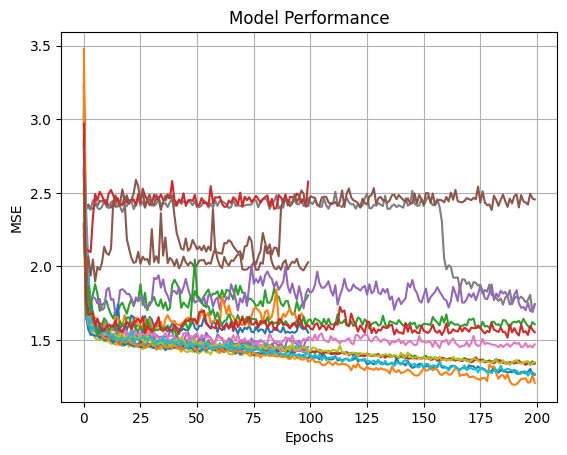

   activation  learning_rate  epochs  layers  test_mae  train_mae  test_loss  \
0     sigmoid           0.01     100       2  1.477041   1.394334   4.416725   
1     sigmoid           0.01     100       3  1.505339   1.388505   4.443105   
2     sigmoid           0.01     200       2  1.639835   1.408230   5.026944   
3     sigmoid           0.01     200       3  1.545813   1.312767   4.785028   
4     sigmoid           0.10     100       2  1.648743   1.498624   4.904697   
5     sigmoid           0.10     100       3  1.988100   1.977970   7.295230   
6     sigmoid           0.10     200       2  1.819599   1.640983   5.943343   
7     sigmoid           0.10     200       3  1.733765   1.676414   5.491228   
8        tanh           0.01     100       2  1.523842   1.324666   4.641914   
9        tanh           0.01     100       3  1.559050   1.429311   4.574947   
10       tanh           0.01     200       2  1.581151   1.222847   4.962899   
11       tanh           0.01     200    

0

In [ ]:
#Our dataset didn't have column headers so have to manually input
#NeuralNetwork constructor adjusted to accomodate datasets with manually inputted headers
columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']

neural_network = NeuralNet("https://raw.githubusercontent.com/AntTranAnt/CS4375_HW2/refs/heads/main/abalone.data", header=None, names=columns) # put in path to your file
neural_network.preprocess()
neural_network.train_evaluate()